# Compte rendu du projet MADI


Seddar mohand oubelaid
## Création de la classe Factor Graph :

Dans cette partie nous avons créé une classe Factor Graph, cette classe représente un **Factor Graph** , et qui est initilisé à travers un objet de type **Réseau Bayésien**, cette classe contient des noeuds de type **variable** ainsi, que des noeuds de type **Factor** pour stocker les tableaux de potentiel.


In [1]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pydotplus as dot
from IPython.display import SVG
import numpy as np

### Factor Graph

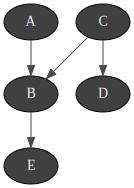

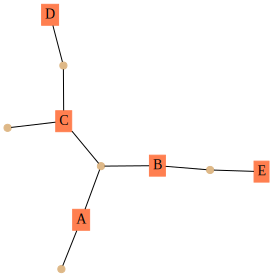

In [2]:
# construction de bn en forme d'un arbre
bn_tree=gum.fastBN("A->B<-C->D->E<-B")
bn_tree.eraseArc("D","E")
gnb.showBN(bn_tree)
# construction de factor graph
gf_tree = FactorGraph();
gf_tree.build(bn_tree);
# show
g=dot.graph_from_dot_data(gf_tree.show())
SVG(g.create_svg())

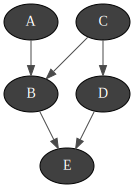

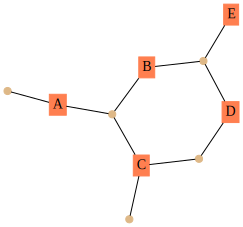

In [4]:
bn=gum.fastBN("A->B<-C->D->E<-B")
gnb.showBN(bn)
# construction de factor graph
gf = FactorGraph();
gf.build(bn);

# show
g=dot.graph_from_dot_data(gf.show())
SVG(g.create_svg())

### TreeSumProductInference

In [5]:
%reload_ext autoreload
%autoreload 2

# TreeSumProductInference
spi=TreeSumProductInference(gf_tree) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages

# LazyPropagation
ie=gum.LazyPropagation(bn_tree)
ie.makeInference()

# affichage
gnb.sideBySide(spi.posterior(3),ie.posterior(3),
              captions=["TreeSumProductInference","bn.LazyPropagation"])

### TreeSumProductInference addEvidence

In [6]:
print("Inference avec evidence:")
# pour comparer
ie=gum.LazyPropagation(bn_tree)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()
#gnb.showPotential(ie.posterior(4))

%reload_ext autoreload
%autoreload 2

spi=TreeSumProductInference(gf_tree) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})
spi.makeInference()         # effectue les calculs de tous les messages
#gnb.showPotential(spi.posterior(4))

# affichage
gnb.sideBySide(spi.posterior(4),ie.posterior(4),
              captions=["TreeSumProductInference","bn.LazyPropagation"])

Inference avec evidence:


### LBPSumProductInference 

In [7]:
%reload_ext autoreload
%autoreload 2


ie=gum.LoopyBeliefPropagation(bn)
ie.makeInference()

spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages

gnb.sideBySide(ie.posterior(3),spi.posterior(3),captions=["gum.LoopyBeliefPropagation","LBPSumProductInference"])

### LBPSumProductInference  AddEvidence

In [9]:
# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()

print("Exo LBPSumproductInference:")
spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})
spi.makeInference()         # effectue les calculs de tous les messages

gnb.sideBySide(ie.posterior(4),spi.posterior(4),captions=["gum.LoopyBeliefPropagation","LBPSumProductInference"])

Inference LBP dans PyAgrum:
Exo LBPSumproductInference:


### TreeMaxProductInference

In [8]:
%reload_ext autoreload
%autoreload 2

spi=TreeMaxProductInference(gf_tree) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
spi.argmax()

{'A': 1, 'B': 1, 'C': 0, 'D': 0, 'E': 0}

### TreeMaxSumInference

### TreeMaxSumInference